# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [79]:
import numpy as np

In [80]:
import matplotlib.pyplot as plt

In [81]:
%matplotlib inline

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [83]:
# Criam-se listas vazias que irão guardar os valores das datas e das temperaturas mensais
datas = []
temperaturas = []
# Abre o arquivo que irá ser usado na prática
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')
# Percorre todas as linhas do arquivo
for linhas in arquivo:
# Para fazer a leitura das linhas que contenham somente os dados solicitados, pulam-se as linhas que comecem com '%' e as linhas em branco.(Linhas vazias são representadas pelos caracteres '\n') 
    if linhas[0] != '%' and linhas[0]!= '\n':
# Variável 'separa' guarda os valores de cada linha divididos em listas
        separa = linhas.split( )
# De acordo com a restrição 4 "Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas)." Semelhante ao 'if' anterior
        if separa[4] != 'NaN':
# 'ano', 'mes' e 'temp_final' transformam em números os dados que estavam em formato de texto
            ano = float(separa[0])
            mes = float(separa[1])
            temp_final = float(separa[2])
# 'data-final' transforma as datas no formato pedido
            data_final = ano + mes/12     
# Aloca 'temp_final' e 'data_final' nas listas criadas acima
            datas.append(data_final)            
            temperaturas.append(temp_final)

In [84]:
# Cria lista vazia que irá guardar os valores das temperaturas anuais
temperaturas_ano = []
# Abre o arquivo que irá ser usado na prática
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')
# Percorre todas as linhas do arquivo
for linhas in arquivo:
# Para fazer a leitura das linhas que contenham somente os dados solicitados, pulam-se as linhas que comecem com '%' e as linhas em branco.(Linhas vazias são representadas pelos caracteres '\n') 
    if linhas[0] != '%' and linhas[0]!= '\n':
# Variável 'separa' guarda os valores de cada linha divididos em listas
        separa = linhas.split( )
# De acordo com a restrição 4 "Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas)." Semelhante ao 'if' anterior
        if separa[4] != 'NaN':
# 'temp_final_ano' transforma em números os dados que estavam em formato de texto
            temp_final_ano = float(separa[4])
# Aloca 'temp_final_ano' na lista criada acima
            temperaturas_ano.append(temp_final_ano)

In [85]:
# Cria lista vazia que irá guardar os valores das médias
mes_temp = []
ano_temp = []
# Pega os elementos nas temperaturas mensais e calcula as médias de acordo com as informações fornecidas no corpo do arquivo
for elemento_temp in range(len(temperaturas)): 
    medias = temperaturas[elemento_temp] + 24.01
    mes_temp.append(medias)
# Pega os elementos nas temperaturas anuais e calcula as médias de acordo com as informações fornecidas no corpo do arquivo    
for elemento_temp_ano in range(len(temperaturas_ano)): 
    medias_ano = temperaturas_ano[elemento_temp_ano] + 24.01
    ano_temp.append(medias_ano)

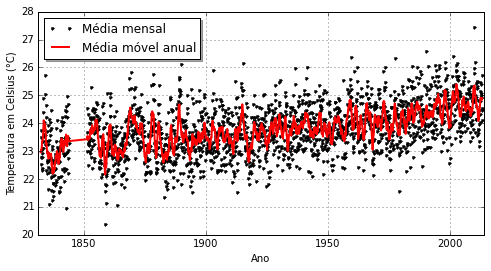

In [86]:
plt.figure(figsize = [8, 4])
plt.grid()
plt.plot(datas, mes_temp, '.k', label='Média mensal') 
plt.plot(datas, ano_temp, '-r', label='Média móvel anual', linewidth = 2)
plt.xlabel("Ano")
plt.ylabel("Temperatura em Celsius (°C)")
plt.xlim(1831,2014)
plt.legend(loc='upper left', shadow=True, fontsize='large')

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).